Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Class Details {0: 'Melanoma', 1: 'Normal'}
Number of Classes 2
Found 400 images belonging to 2 classes.
Training Samples: 480
Validation Samples: 120
Test Samples: 400


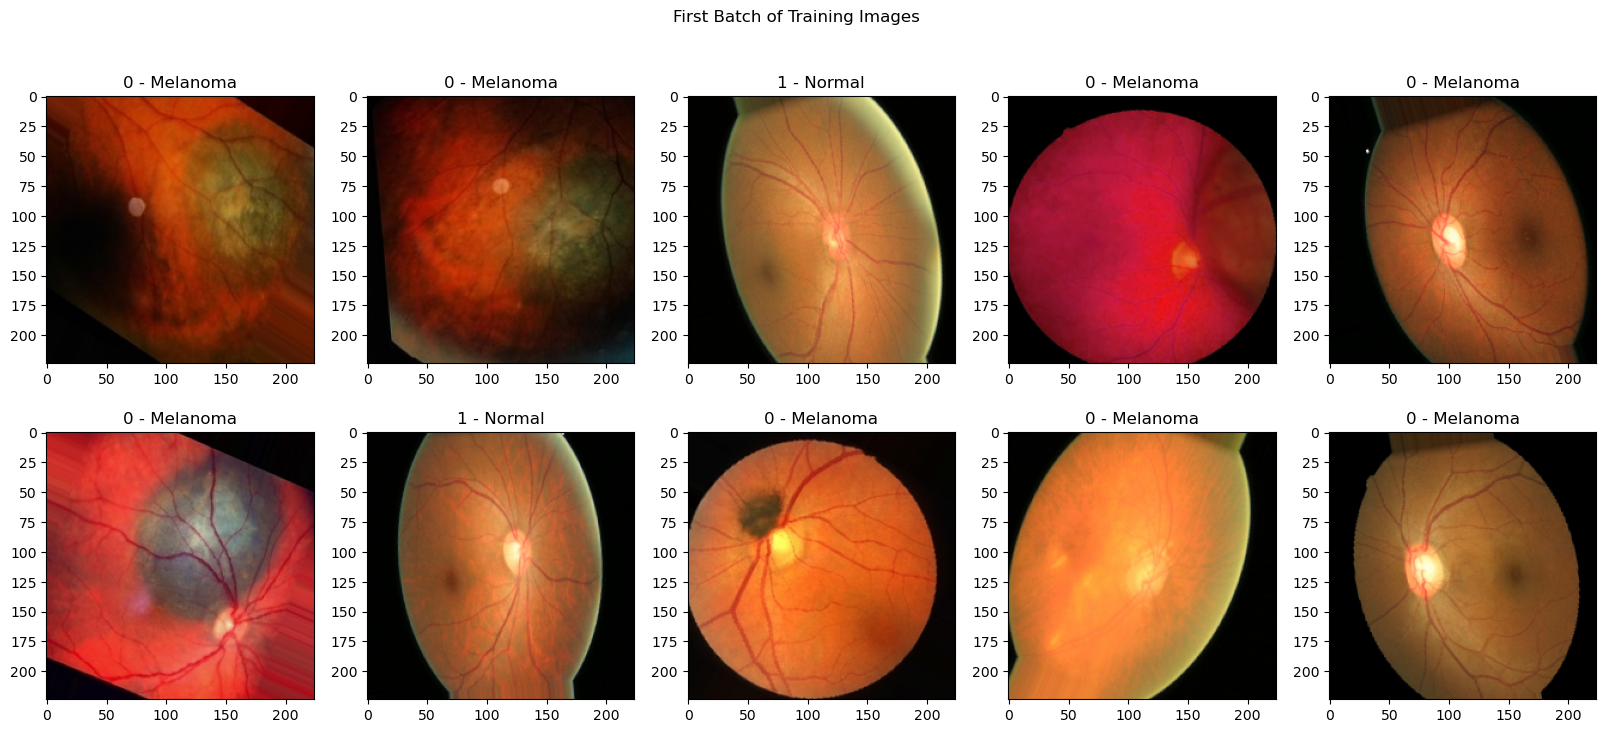

Training set class distribution:
Class 0: 66.67% (320)
Class 1: 33.33% (160)
Total samples: 480


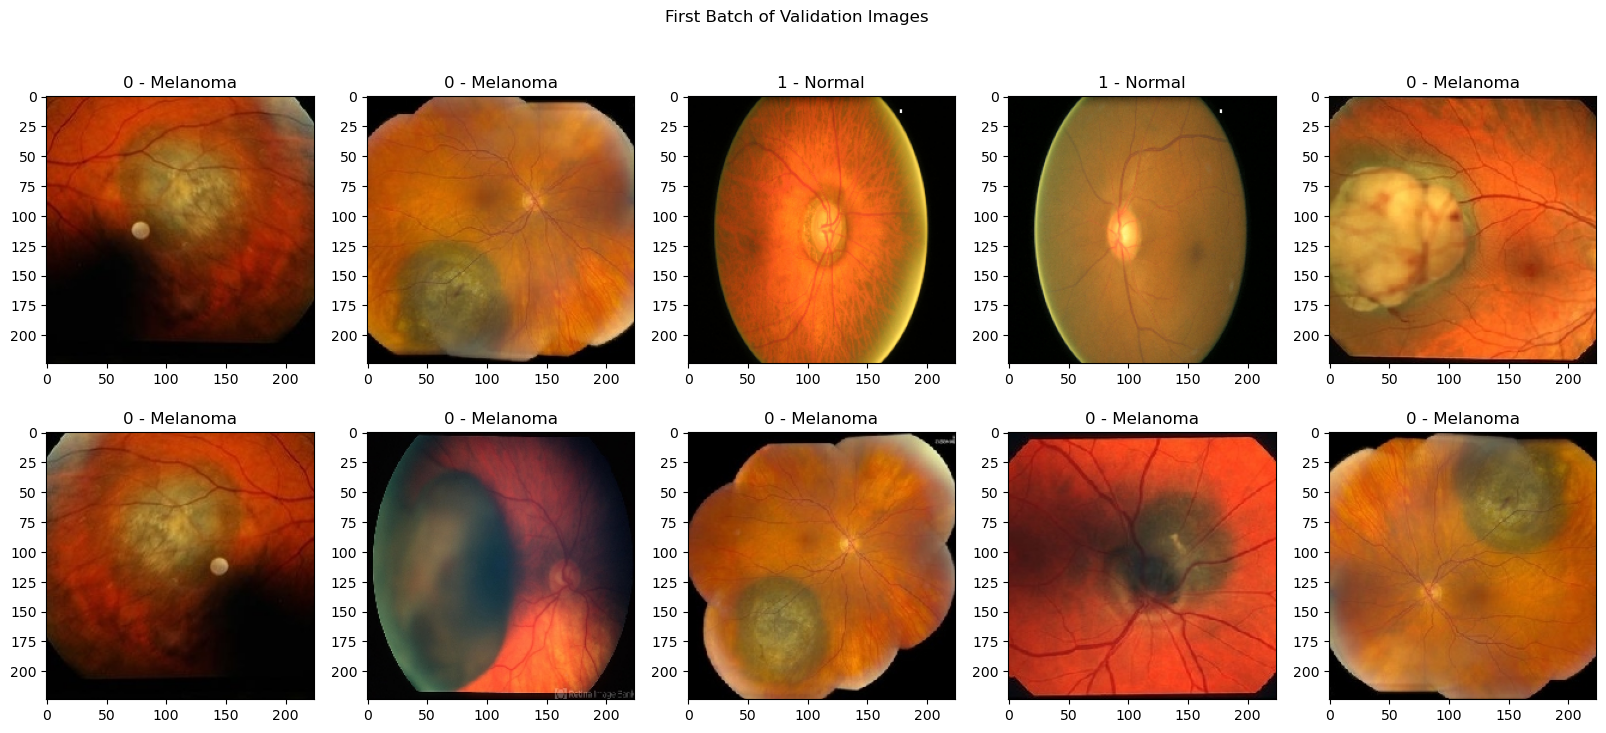

Validation set class distribution:
Class 0: 66.67% (80)
Class 1: 33.33% (40)
Total samples: 120


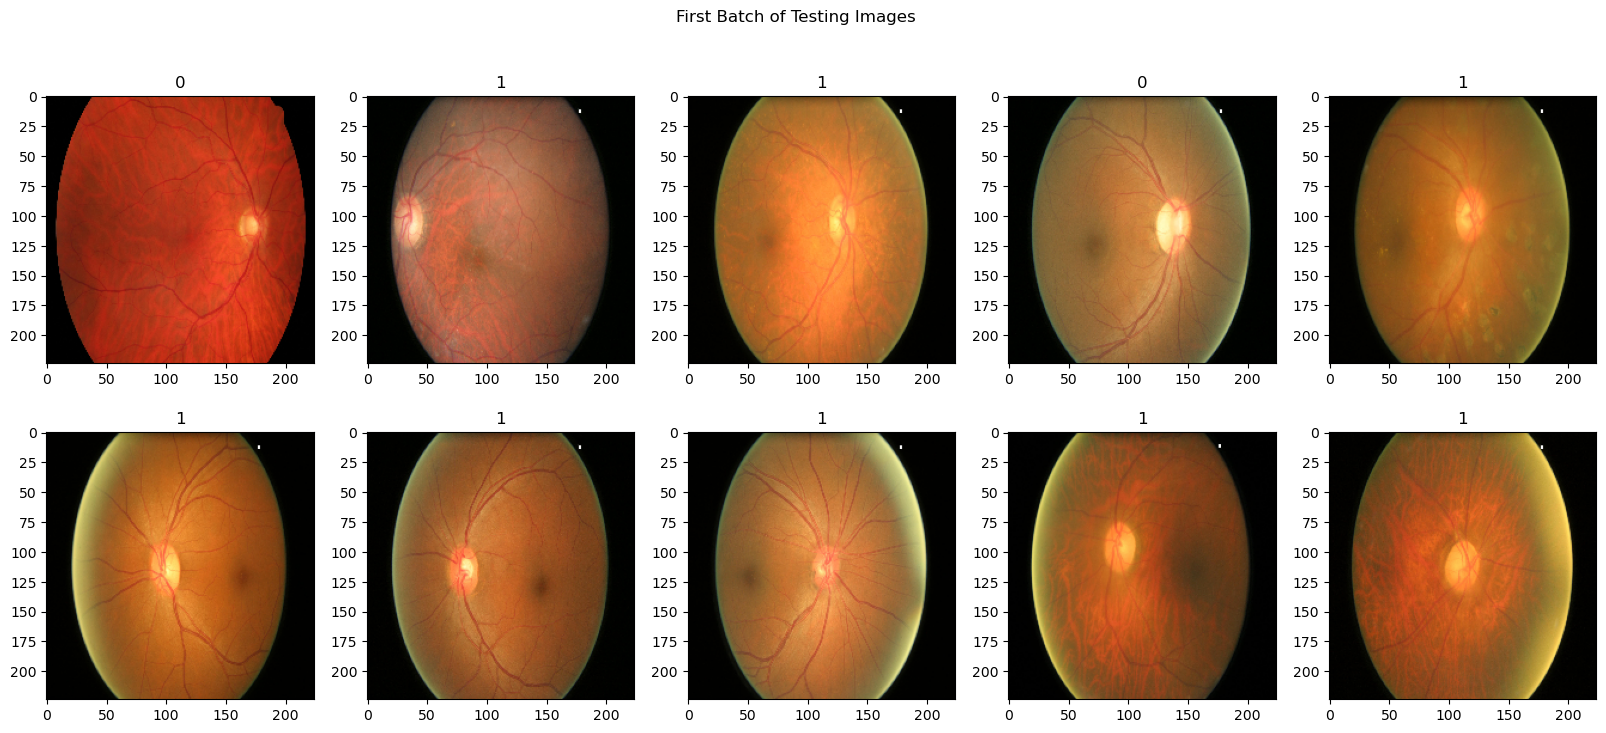

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import save_model
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import class_weight
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing import image

# Define constants
TRAINING_DIR = r'C:\Users\mithi_l0ihziv\Downloads\Dataset\Dataset\Train'
TEST_DIR = r'C:\Users\mithi_l0ihziv\Downloads\Dataset\Dataset\Test'
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

# Create data generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.10,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=13,
)

validation_generator = valid_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=True,
    seed=13,
)

class_indices = {v: k for k, v in train_generator.class_indices.items()}
print("Class Details", class_indices)

num_classes = len(class_indices)
print("Number of Classes", num_classes)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

print(f"Training Samples: {train_generator.samples}")
print(f"Validation Samples: {validation_generator.samples}")
print(f"Test Samples: {test_generator.samples}")

# Display first batch of training images
first_batch = next(iter(train_generator))
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        label_index = first_batch_labels[ind].argmax()
        ax2.set_title(f"{label_index} - {class_indices[label_index]}")
        ind += 1

fig.suptitle('First Batch of Training Images')
plt.show()

# Count the number of samples in each class
class_counts = np.unique(train_generator.classes, return_counts=True)[1]

# Print the percentage of samples that belong to each class
print("Training set class distribution:")
for i, count in enumerate(class_counts):
    print(f'Class {i}: {count/len(train_generator.classes):.2%} ({count})')
print(f"Total samples: {train_generator.samples}")

# Display first batch of validation images
first_batch = next(iter(validation_generator))
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
ind = 0
for ax1 in axs:
    for ax2 in ax1:
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        label_index = first_batch_labels[ind].argmax()
        ax2.set_title(f"{label_index} - {class_indices[label_index]}")
        ind += 1

fig.suptitle('First Batch of Validation Images')
plt.show()

# Count the number of samples in each class
class_counts = np.unique(validation_generator.classes, return_counts=True)[1]

# Print the percentage of samples that belong to each class
print("Validation set class distribution:")
for i, count in enumerate(class_counts):
    print(f'Class {i}: {count/len(validation_generator.classes):.2%} ({count})')
print(f"Total samples: {validation_generator.samples}")

# Display first batch of test images
first_batch = next(iter(test_generator))
first_batch_images = first_batch[0]
first_batch_labels = first_batch[1]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind]
        ax2.imshow(image_data)
        label_index = first_batch_labels[ind].argmax()
        ax2.set_title(f"{label_index}") # close the string literal here
        ind += 1

fig.suptitle('First Batch of Testing Images') 
plt.show()

In [20]:
# Count the number of samples in each class
class_counts = np.unique(test_generator.classes, return_counts=True)[1]

# Print the percentage of samples that belong to each class
print("Test set class distribution:")
for i, count in enumerate(class_counts):
    print(f'Class {i}: {count/len(test_generator.classes):.2%} ({count})')
print(f"Total samples: {test_generator.samples}")

# Define the model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001) ,
    metrics=["accuracy"],
)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights = dict(enumerate(class_weights))
print("", class_weights)

# Define callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss", restore_best_weights=True)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-6, mode='auto', verbose=1)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('weights-{epoch:02d}-val_loss-{val_loss:.2f}.keras', save_best_only=True, save_weights_only=False, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10,  # Set a fixed integer value
    verbose=1,
    callbacks=[early_stopping_cb, reduce_lr_cb, checkpoint_cb],
    class_weight=class_weights
)

# Save the model
# Save the model
model.save('my_eye_model.keras')

Test set class distribution:
Class 0: 25.00% (100)
Class 1: 75.00% (300)
Total samples: 400


C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,960,194 (18.92 MB)

 Trainable params: 4,960,194 (18.92 MB)

 Non-trainable params: 0 (0.00 B)

 {0: 0.75, 1: 1.5}
Epoch 1/10


C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5037 - loss: 0.6979
Epoch 1: val_loss improved from inf to 0.71180, saving model to weights-01-val_loss-0.71.keras


C:\Users\mithi_l0ihziv\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4968 - loss: 0.6972 - val_accuracy: 0.3333 - val_loss: 0.7118 - learning_rate: 1.0000e-05
Epoch 2/10

Epoch 2: val_loss did not improve from 0.71180
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 0.7118 - learning_rate: 1.0000e-05
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3623 - loss: 0.6740
Epoch 3: val_loss improved from 0.71180 to 0.65593, saving model to weights-03-val_loss-0.66.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.3636 - loss: 0.6738 - val_accuracy: 0.5417 - val_loss: 0.6559 - learning_rate: 1.0000e-05
Epoch 4/10

Epoch 4: val_loss improved from 0.65593 to 0.65593, saving model to weights-04-val_loss-0.66.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5417 - val_loss: 0.6559 - learning_rate: 1.0000e-05
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accur

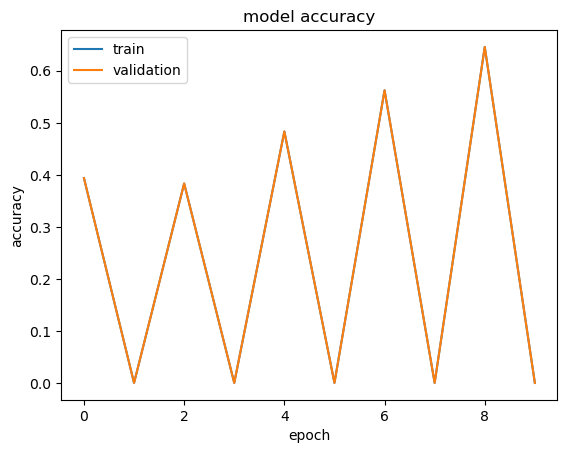

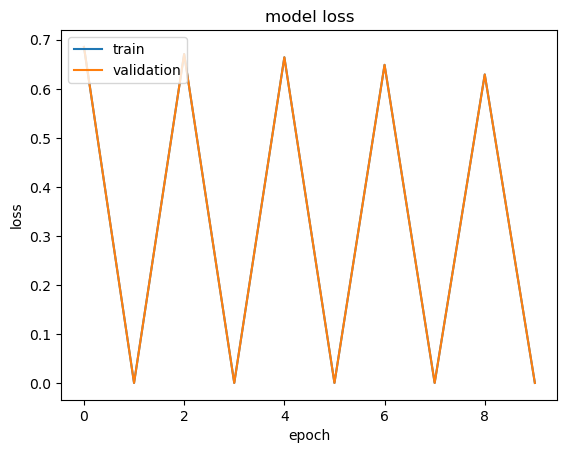

13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8321 - loss: 0.5437
test_loss: 0.5562318563461304, test_acc: 0.8100000023841858
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step
              precision    recall  f1-score   support

           0       0.38      0.09      0.15       100
           1       0.76      0.95      0.84       300

    accuracy                           0.73       400
   macro avg       0.57      0.52      0.49       400
weighted avg       0.66      0.73      0.67       400

[[  9  91]
 [ 15 285]]
Accuracy: 0.735


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def plot_hist(hist, metric="accuracy"):
    plt.plot(hist.history[metric])
    plt.plot(hist.history[f"{metric}"])
    plt.title(f"model {metric}")
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
plot_hist(history, "accuracy")
plot_hist(history, "loss")

test_loss, test_acc = model.evaluate(test_generator)
print(f"test_loss: {test_loss}, test_acc: {test_acc}")

y_pred = model.predict(test_generator)
y_pred = y_pred.argmax(axis=1)
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print("Accuracy:", accuracy)

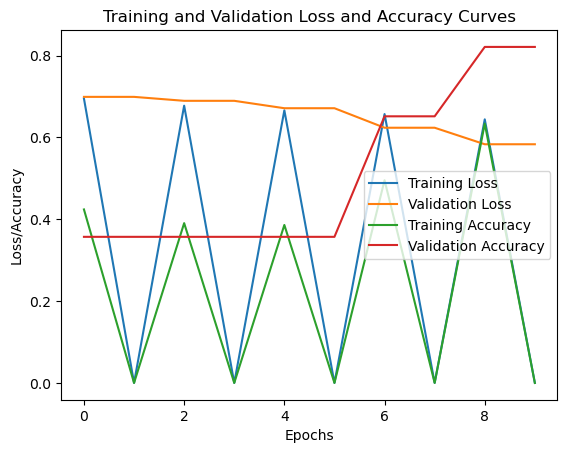

In [73]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training and Validation Loss and Accuracy Curves')
plt.show()

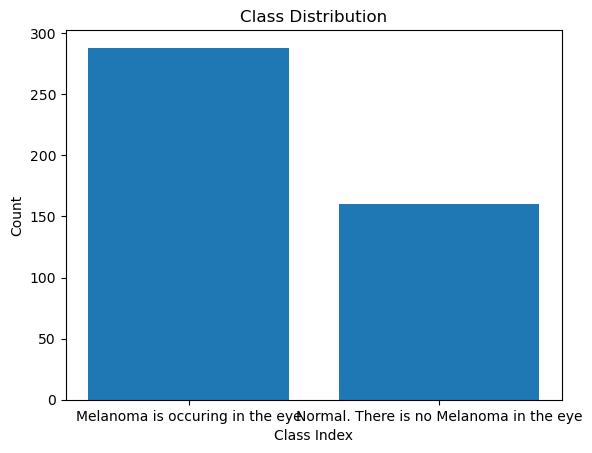

In [74]:
class_counts = np.unique(train_generator.classes, return_counts=True)[1]
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(range(len(class_counts)), list(class_indices.values()))
plt.show()

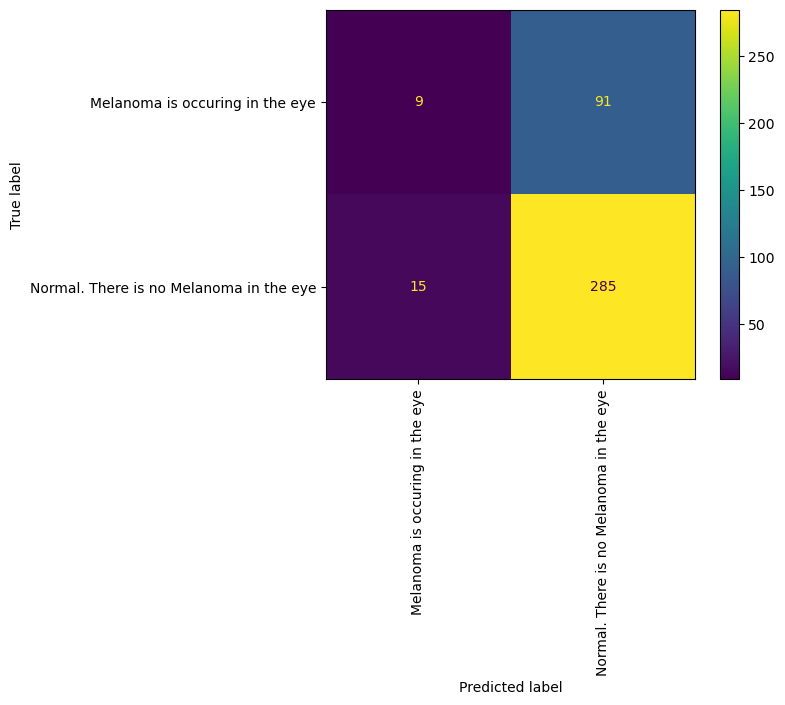

In [28]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_indices.values())
cmd.plot(xticks_rotation="vertical")
plt.show()

In [23]:
model = tf.keras.models.load_model(r'my_eye_model.keras')

In [24]:
# Class indices from the training generator
class_indices = {0: 'Melanoma is occuring in the eye', 1: 'Normal. There is no Melanoma in the eye'} # Update this with actual class names from your dataset


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


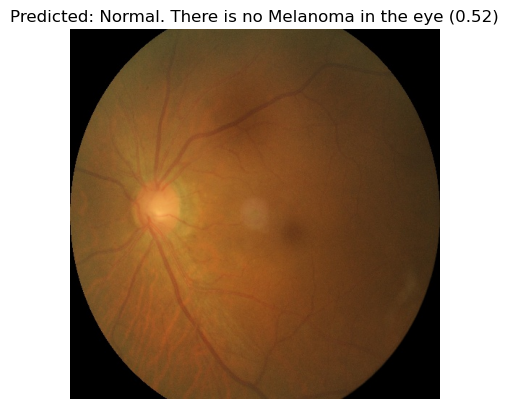

Solution: No melanoma detected. Continue with regular eye check-ups.
Predicted class: Normal. There is no Melanoma in the eye, Confidence: 0.5200566649436951


In [26]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image by 1/255
    return img_array

def predict_image(img_path3):
    img_array2 = load_and_preprocess_image(img_path3)
    prediction2 = model.predict(img_array2)
    predicted_class_index2 = np.argmax(prediction2)
    predicted_class2 = class_indices[predicted_class_index2]
    confidence = prediction2[0][predicted_class_index2]

    # Display the image with the predicted class
    plt.imshow(image.load_img(img_path3))
    plt.title(f"Predicted: {predicted_class2} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

    if predicted_class2 == 'Melanoma is occuring in the eye':
        if confidence > 0.7:  # adjust the confidence threshold as needed
            print("Solution: Consult an ophthalmologist immediately for further evaluation and treatment.")
        else:
            print("Solution: While the model predicts melanoma, the confidence is low. It's recommended to consult an ophthalmologist for a more thorough examination.")
    else:
        print("Solution: No melanoma detected. Continue with regular eye check-ups.")

    return predicted_class2, confidence


img_path3 = r'C:\Users\mithi_l0ihziv\Downloads\dataset2\Train\Normal\normal (1).jpg'  # Update with the path to your image

predicted_class2, confidence = predict_image(img_path3)
print(f"Predicted class: {predicted_class2}, Confidence: {confidence}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


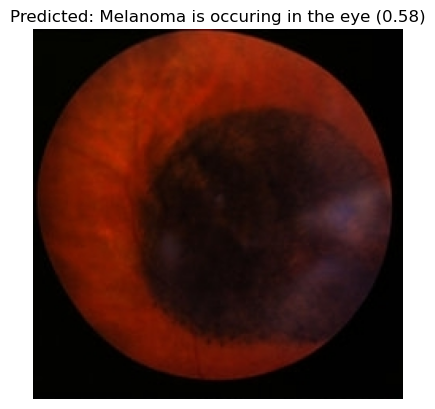

Solution: the tumor size is larger. so Radiation therapy or Enucleation is the treatment 
Predicted class: Melanoma is occuring in the eye, Confidence: 0.5801120400428772


In [27]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image by 1/255
    return img_array

def predict_image(img_path4):
    img_array5 = load_and_preprocess_image(img_path4)
    prediction5 = model.predict(img_array5)
    predicted_class_index5 = np.argmax(prediction5)
    predicted_class5 = class_indices[predicted_class_index5]
    confidence5 = prediction5[0][predicted_class_index5]

    # Display the image with the predicted class
    plt.imshow(image.load_img(img_path4))
    plt.title(f"Predicted: {predicted_class5} ({confidence5:.2f})")
    plt.axis('off')
    plt.show()
    
    if predicted_class5 == 'Melanoma is occuring in the eye':
        if confidence5 > 0.5:  # adjust the confidence threshold as needed
            print("Solution: the tumor size is larger. so Radiation therapy or Enucleation is the treatment ")
        else:
            print("Solution: While the model predicts melanoma, the confidence is low. It's recommended to consult an ophthalmologist for a more thorough examination. Laser therapy , Brachytherapy or Surgical removal is the treatment")
    else:
        print("Solution: No melanoma detected. Continue with regular eye check-ups.")
    return predicted_class5, confidence5

# Path to the image you want to predict
img_path4 = r'C:\Users\mithi_l0ihziv\Downloads\MELANOMA OLD\melanoma (608).jpeg'  # Update with the path to your image

predicted_class5, confidence5 = predict_image(img_path4)
print(f"Predicted class: {predicted_class5}, Confidence: {confidence5}")